In [29]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

Problem: You work as a data scientist for Instagram. They want to predict the number of hours a user will spend on the site on an average day. They give you a labeled data sample of 10,000 users and 200 different variables to generate your model. You create a model that performs very well on the training data, but there is a big dip in your performance on the test set.  What is the issue and what should you do? Be specific in your solutions.

# Ridge and Lasso Regression

## SWBAT Implement a regularize regression model to help improve the performance of their model on a test set of data.

### Key Questions:

* When should you use a regularized model instead of a normal model?

* How do regularized models differ from normal linear regression?

* How does a Ridge model differ from a Lasso Model?

# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](Embedded_1.webp)

![alt text](bias-variance-train-test-error.png)

![alt text](model_equation.png)

In [ ]:
This model was fit by minimizing the cost function.

![alt text](costfunction.png)

Two common (and somewhat related) ways to think of model complexity:

* Model complexity as a function of the weights of all the features in the model.
* Model complexity as a function of the total number of features with nonzero weights. 

**Ridge Regression** : In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

![alt text](ridgecost.png)

This puts a constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. 

**Ridge regression shrinks the coefficients and it helps to reduce the model complexity**

When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit:

* If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.

* If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

In [24]:
X_train = pd.read_csv('diabetes_64_train.csv',index_col=0)
X_test = pd.read_csv('diabetes_64_test.csv', index_col=0)
y_test = pd.read_csv('y_test_diabetes.csv', index_col=0, names=['outcome'])
y_train = pd.read_csv('y_train_diabetes.csv', index_col=0, names=['outcome'])

In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# evaluation using r-square

lm.score(X_train,y_train)


0.621154202269985

In [36]:
y_pred = lm.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MSE: 3465.722433305766
RMSE: 58.87038672631399


In [38]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std()

0.8205823970833349

Text(0.5,1,'Residual plot')

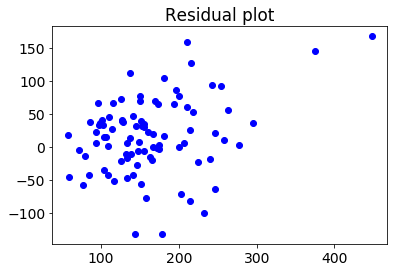

In [41]:
#residual plot

x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

# plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

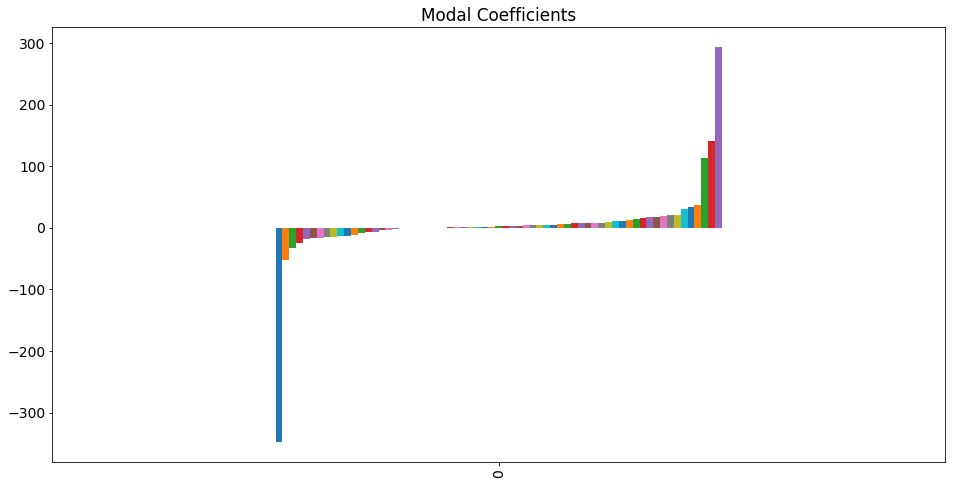

In [72]:
coef = pd.DataFrame(data=lm.coef_, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

MSE: 3058.6648889297144
RMSE: 55.30519766649166
0.7708879488649979


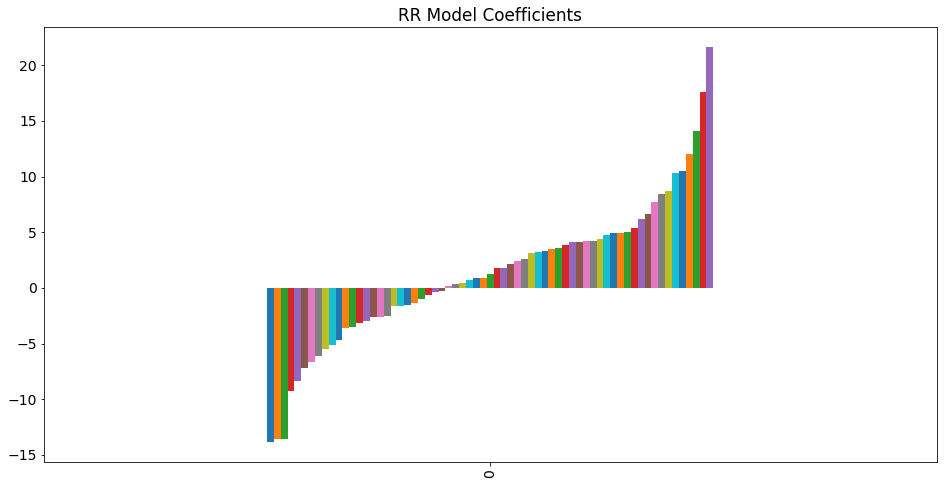

In [74]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
coef = pd.DataFrame(data=ridgeReg.coef_, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='RR Model Coefficients', legend=False, figsize=(16,8))

MSE: 2824.605652444171
RMSE: 53.147019224451064
0.7408055366746995


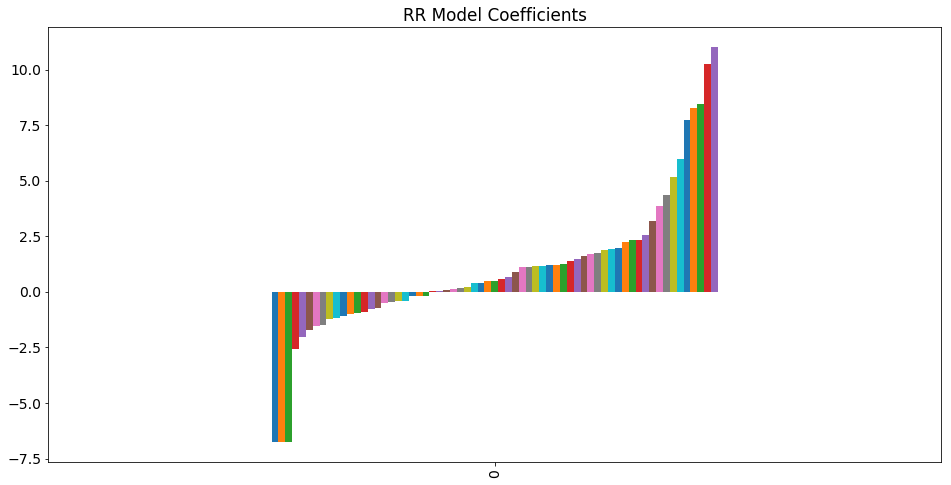

In [75]:
## training the model

ridgeReg = Ridge(alpha=1, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
coef = pd.DataFrame(data=ridgeReg.coef_, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='RR Model Coefficients', legend=False, figsize=(16,8))

MSE: 3749.939393641962
RMSE: 61.23674871873883
0.853566637617344


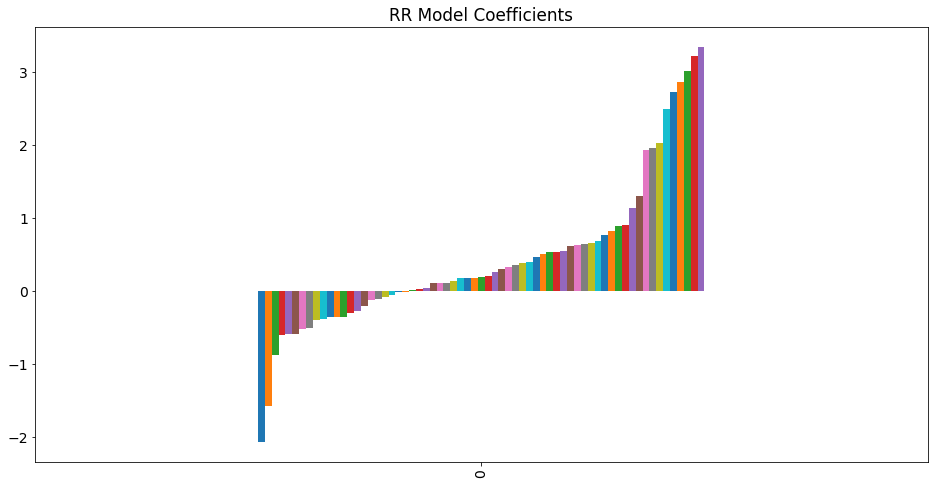

In [80]:
## training the model

ridgeReg = Ridge(alpha=10, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
coef = pd.DataFrame(data=ridgeReg.coef_, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='RR Model Coefficients', legend=False, figsize=(16,8))

**Important Points:**
* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.
* It uses L2 regularization technique.

## LASSO REgression
The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output.  
**Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.**

MSE: 2832.5482144218554
RMSE: 53.22168932326233
0.7418463480584917


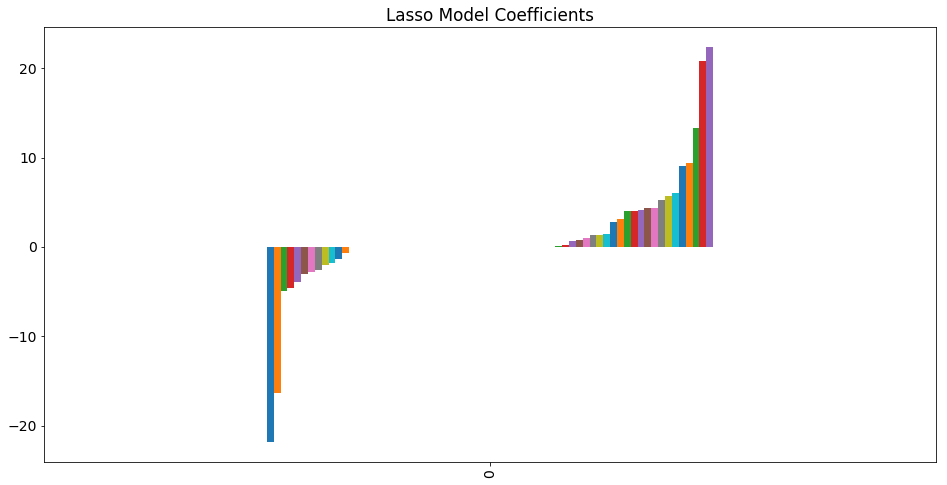

In [86]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8))


MSE: 2774.1865676659586
RMSE: 52.67054744034809
0.7341640929797657


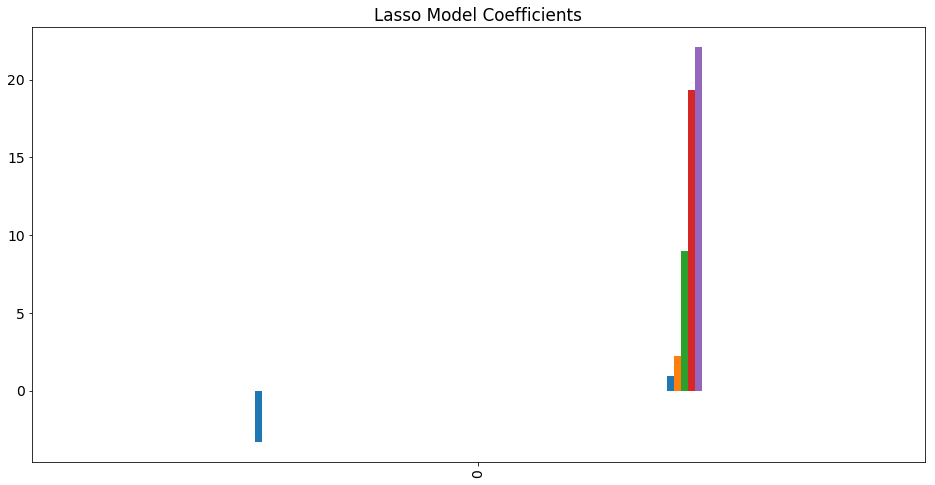

In [90]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=.5, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8))

MSE: 3140.739320640092
RMSE: 56.04229938751703
0.7811622604632075


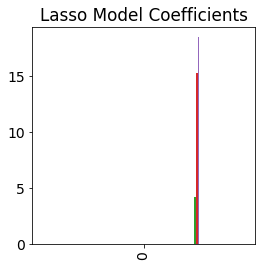

In [88]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=1, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(4,4))

**Important Points:**
* It uses L1 regularization technique (will be discussed later in this article)
* It is generally used when we have more number of features, because it automatically does feature selection.

Finally to end this meditation, let’s summarize what we have learnt so far

1. Cost function of Ridge and Lasso regression and importance of regularization term.
2. Went through some examples using simple data-sets to understand Linear regression as a limiting case for both Lasso and Ridge regression.
Understood why Lasso regression can lead to feature selection whereas Ridge can only shrink coefficients close to zero.